In [2]:
#Importing the required python libraries for EDA & Hypothesis testing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from scipy.stats import binom,geom,norm  #Libraries for normal, binomial & geometric distribution respectively
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel #Libraries for Ttest 1 sample, Ttest Index (for 2 groups) and relative T-test

from scipy.stats import chisquare, chi2 #calculate chisquare value internally, check the p-value for known chi-square val
from scipy.stats import chi2_contingency #calculate chi-square val for 2D Matrix

from scipy.stats import f_oneway, kruskal #Check statistical difference between Numerical vs Categorical values
from scipy.stats import shapiro #Test if  data is Gaussian (50 to 200 samples)
from scipy.stats import levene #Test Variance between two groups


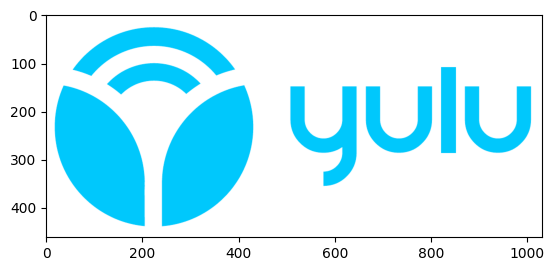

In [11]:
#Importing the dataset to Pandas dataframe

data=pd.read_csv('yulu.csv')

In [12]:
#Checking first few entries of dataset to understand the available data
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
#Checking the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Column Description:

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered